In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 13.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import cv2
from ultralytics import YOLO

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 124MB/s]


In [4]:
results=model.predict(source="/content/Road.png",
              save=True, conf=0.2,iou=0.5)


image 1/1 /content/Road.png: 384x640 2 persons, 8 cars, 1 truck, 1 handbag, 1120.4ms
Speed: 15.1ms preprocess, 1120.4ms inference, 31.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [5]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [6]:
result = results[0]
box = result.boxes[0]
for result in results:
    boxes = result.boxes
    masks = result.masks
    probs = result.probs

In [7]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: truck
Coordinates: [169, 51, 363, 232]
Probability: 0.93
---
Object type: car
Coordinates: [37, 142, 181, 242]
Probability: 0.92
---
Object type: person
Coordinates: [354, 127, 463, 338]
Probability: 0.92
---
Object type: car
Coordinates: [0, 139, 63, 204]
Probability: 0.85
---
Object type: car
Coordinates: [545, 141, 582, 160]
Probability: 0.82
---
Object type: car
Coordinates: [513, 139, 547, 159]
Probability: 0.66
---
Object type: handbag
Coordinates: [409, 177, 441, 270]
Probability: 0.6
---
Object type: person
Coordinates: [290, 121, 325, 147]
Probability: 0.58
---
Object type: car
Coordinates: [0, 163, 10, 220]
Probability: 0.51
---
Object type: car
Coordinates: [126, 134, 188, 197]
Probability: 0.46
---
Object type: car
Coordinates: [0, 112, 55, 144]
Probability: 0.31
---
Object type: car
Coordinates: [56, 136, 85, 147]
Probability: 0.25
---


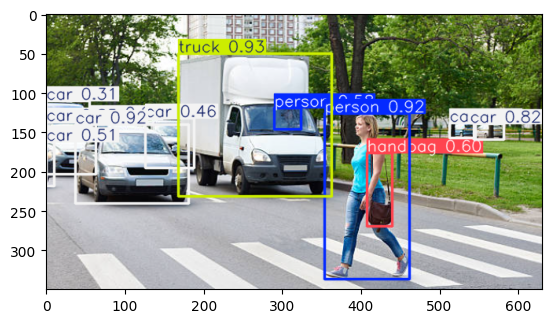

In [8]:
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.imshow(plot)